# Desenvolvimento Filtro Passa Baixa

Analisando o sinal, podemos ver que o ruído se encontra em torno de 8 kHz, mas para remover completamente ele e outros ruídos de fundo podemos simplesmente pegar a faixa de frequência da voz humana e multiplicar seu limite superior por uma constante para deixar passar algumas harmônicas.

Foi decidido então que a frequência de corte do filtro deve se encontrar em torno de 2 kHz, dado que a voz humana vai até ~250 Hz.

O filtro selecionado foi um elíptico IIR de ordem 10, devido a sua alta qualidade e baixo ripple.

In [2]:
import matplotlib.pyplot as plt
import scipy.io.wavfile as wavf
import scipy.signal as sp

import pandas as pd
import numpy as np

import DSP

df = pd.read_csv("ab_PB.csv")
b  = np.array(df['b'])
a  = np.array(df['a'])

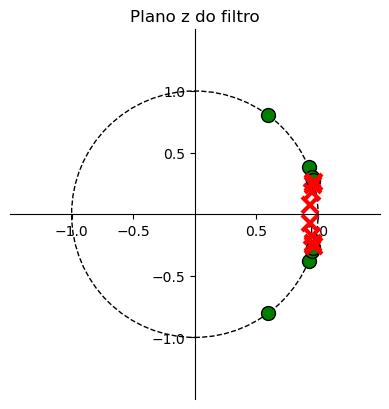

(array([0.59647798+0.80262944j, 0.59647798-0.80262944j,
        0.92379266+0.3828931j , 0.92379266-0.3828931j ,
        0.95402383+0.29973075j, 0.95402383-0.29973075j,
        0.96290543+0.26983909j, 0.96290543-0.26983909j,
        0.96102301+0.27646842j, 0.96102301-0.27646842j]),
 array([0.96425808+0.26047458j, 0.96425808-0.26047458j,
        0.96204816+0.25394578j, 0.96204816-0.25394578j,
        0.95744418+0.23378357j, 0.95744418-0.23378357j,
        0.94769793+0.18092308j, 0.94769793-0.18092308j,
        0.93563923+0.07199871j, 0.93563923-0.07199871j]))

In [3]:
DSP.zplane(b, a, title="Plano z do filtro")

In [24]:
[fs, raw_signal]    = wavf.read("Sinais/fala-tom-alta-freq.wav")
converted_signal    = raw_signal/(float(1<<16) - 1)     # Converte de int16 para float
filtered_signal     = sp.lfilter(b, a, converted_signal)
filtered_signal     = DSP.normalize(filtered_signal)

wavf.write("Sinais/fala_sem_tom_alta_freq.wav", fs, filtered_signal)

C:\Users\emanuel\AppData\Local\Temp\ipykernel_6668\1734008305.py:1: WavFileWarning: Chunk (non-data) not understood, skipping it.
  [fs, raw_signal]    = wavf.read("Sinais/fala-tom-alta-freq.wav")
